# Load Data Preparation

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv("dataset muzakki.csv")
df.head()

,npwz,tanggal_transaksi,umur,gender,occupation,name,nominal,periode_transaksi
0,317110010025286,2022-12-23,62,wanita,NIA. 01050001,Dyah Rudati Andayani,800000,Reguler
1,317110010022739,2022-12-23,4,wanita,NIA. 13030039,Dwi Retno Damayanti,375000,Reguler
2,317110010003044,2022-12-23,72,pria,Ketua Dewan Pengawas Syariah PT PNM,Prof. Dr. KH. Didin Hafidhuddin,5000000,Reguler
3,317110010046945,2022-12-23,80,pria,NIA. A15080002,Zainulbahar Noor,1237500,Reguler
4,317110010025286,2022-12-27,62,wanita,NIA. 01050001,Dyah Rudati Andayani,800000,Reguler


# Data Understanding

Exploratory Data Analysis (EDA)

In [5]:
#Deskripsi Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   npwz               8153 non-null   int64 
 1   tanggal_transaksi  8153 non-null   object
 2   umur               8153 non-null   int64 
 3   gender             8153 non-null   object
 4   occupation         8153 non-null   object
 5   name               8153 non-null   object
 6   nominal            8153 non-null   int64 
 7   periode_transaksi  8153 non-null   object
dtypes: int64(3), object(5)
memory usage: 509.7+ KB


In [6]:
#Kualitas Data

df.isnull().sum()

npwz                 0
tanggal_transaksi    0
umur                 0
gender               0
occupation           0
name                 0
nominal              0
periode_transaksi    0
dtype: int64

In [7]:
df.describe()

,npwz,umur,nominal
count,8.153000e+03,8153.000000,8.153000e+03
mean,3.171100e+14,40.310928,1.270275e+06
std,1.473195e+05,21.462278,7.929426e+06
min,3.171100e+14,4.000000,1.000000e+00
25%,3.171100e+14,33.000000,1.719800e+05
50%,3.171100e+14,39.000000,3.127840e+05
75%,3.171100e+14,45.000000,6.608210e+05
max,3.171100e+14,1031.000000,4.500000e+08


In [8]:
for i in range(len(df)):
   if df.loc[i, "umur"] > 80:
         df.loc[i, "umur"] = np.random.randint(18, 80)

Visualisasi dan Segmentasi Data

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


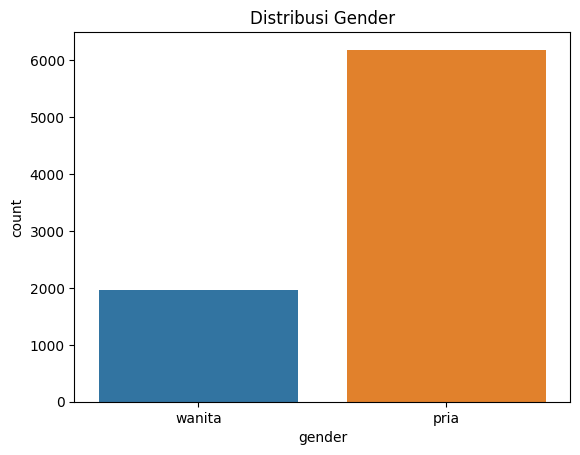

In [9]:
# Visualisasi distribusi gender
sns.countplot(x='gender', data=df)
plt.title('Distribusi Gender')
plt.show()

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


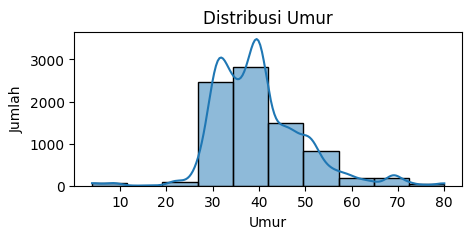

In [10]:
# Visualisasi distribusi umur
plt.figure(figsize=(5, 2))
sns.histplot(df['umur'], bins=10, kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

# Data Preparation

### Data cleaning

In [11]:
#Data Cleaning

kolom_yang_dihapus = ['occupation', 'npwz', 'name', 'tanggal_transaksi']
df = df.drop(columns=kolom_yang_dihapus)

In [12]:
# Menampilkan data setelah penghapusan kolom
print("\nData setelah penghapusan kolom:")
print(df)


Data setelah penghapusan kolom:
      umur  gender  nominal periode_transaksi
0       62  wanita   800000           Reguler
1        4  wanita   375000           Reguler
2       72    pria  5000000           Reguler
3       80    pria  1237500           Reguler
4       62  wanita   800000           Reguler
...    ...     ...      ...               ...
8148    69    pria   100000            Kurban
8149    69    pria  2500000            Kurban
8150    69    pria   475000            Kurban
8151    69    pria   500000            Kurban
8152    69    pria   475000           Reguler

[8153 rows x 4 columns]


In [13]:
# Menyimpan data yang sudah dihapus kolomnya ke dalam file CSV baru
df.to_csv("data_setelah_penghapusan_kolom.csv", index=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               8153 non-null   int64 
 1   gender             8153 non-null   object
 2   nominal            8153 non-null   int64 
 3   periode_transaksi  8153 non-null   object
dtypes: int64(2), object(2)
memory usage: 254.9+ KB


### Data Transformation

In [15]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('data_setelah_penghapusan_kolom.csv') 
print(df)

      umur  gender  nominal periode_transaksi
0       62  wanita   800000           Reguler
1        4  wanita   375000           Reguler
2       72    pria  5000000           Reguler
3       80    pria  1237500           Reguler
4       62  wanita   800000           Reguler
...    ...     ...      ...               ...
8148    69    pria   100000            Kurban
8149    69    pria  2500000            Kurban
8150    69    pria   475000            Kurban
8151    69    pria   500000            Kurban
8152    69    pria   475000           Reguler

[8153 rows x 4 columns]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               8153 non-null   int64 
 1   gender             8153 non-null   object
 2   nominal            8153 non-null   int64 
 3   periode_transaksi  8153 non-null   object
dtypes: int64(2), object(2)
memory usage: 254.9+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Mengkodekan kolom 'Gender'
df['gender'] = encoder.fit_transform(df['gender'])

# Mengkodekan kolom 'Periode Transaksi'
df['periode_transaksi'] = encoder.fit_transform(df['periode_transaksi'])

# Menampilkan DataFrame dengan kolom yang telah diencode
print(df)

      umur  gender  nominal  periode_transaksi
0       62       1   800000                  2
1        4       1   375000                  2
2       72       0  5000000                  2
3       80       0  1237500                  2
4       62       1   800000                  2
...    ...     ...      ...                ...
8148    69       0   100000                  0
8149    69       0  2500000                  0
8150    69       0   475000                  0
8151    69       0   500000                  0
8152    69       0   475000                  2

[8153 rows x 4 columns]


### Elbow Method

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

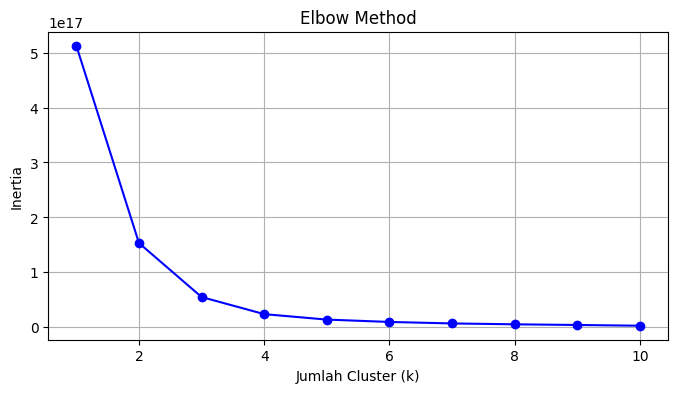

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df2 = df['nominal'].to_numpy().reshape(-1, 1)

# List untuk menyimpan nilai inersia
inertia = []

# Melakukan perulangan untuk berbagai nilai k (misalnya, dari 1 hingga 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

# Menampilkan plot elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()


In [19]:
# Menentukan jumlah cluster (k=2)
k = 2

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df2)
df['Cluster'] = kmeans.labels_


C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
print(df)



      umur  gender  nominal  periode_transaksi  Cluster
0       62       1   800000                  2        0
1        4       1   375000                  2        0
2       72       0  5000000                  2        0
3       80       0  1237500                  2        0
4       62       1   800000                  2        0
...    ...     ...      ...                ...      ...
8148    69       0   100000                  0        0
8149    69       0  2500000                  0        0
8150    69       0   475000                  0        0
8151    69       0   500000                  0        0
8152    69       0   475000                  2        0

[8153 rows x 5 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


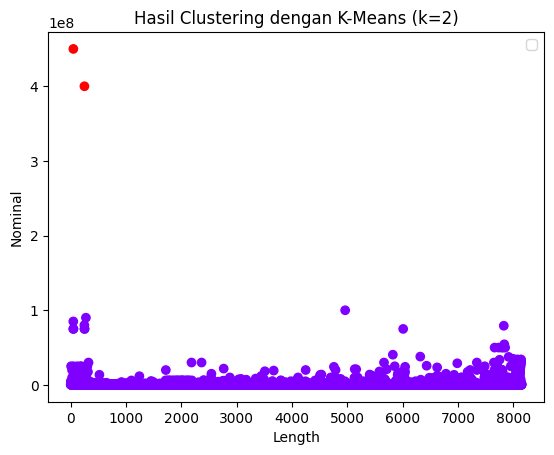

In [21]:
# Lihat data nominal
# Plot hasil clustering
plt.scatter(range(len(df)), df["nominal"], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Length')
plt.ylabel('Nominal')
plt.title('Hasil Clustering dengan K-Means (k=2)')
plt.legend()
plt.show()



In [22]:
df["Cluster"].value_counts()

Cluster
0    8151
1       2
Name: count, dtype: int64

In [23]:
# Menentukan jumlah cluster (k=3)
# Percobaan k = 3
k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df2)
df['Cluster'] = kmeans.labels_


C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
df["Cluster"].value_counts()

Cluster
0    8042
2     109
1       2
Name: count, dtype: int64

In [25]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df2)
df['Cluster'] = kmeans.labels_

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
df["Cluster"].value_counts()

Cluster
0    8002
3     133
2      16
1       2
Name: count, dtype: int64

In [27]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df2)
df['Cluster'] = kmeans.labels_

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
df["Cluster"].value_counts()

Cluster
0    7729
4     313
3      93
2      16
1       2
Name: count, dtype: int64

In [29]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df2)
df['Cluster'] = kmeans.labels_


C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
df["Cluster"].value_counts()

Cluster
0    8042
2     109
1       2
Name: count, dtype: int64

In [31]:
Q1 = df["nominal"].quantile(.25)
Q3 = df["nominal"].quantile(.75)
IQR = Q3 - Q1

min_IQR = IQR - 1.5*Q1
max_IQR = IQR + 1.5*Q3

# remove outlier
df = df[~((df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(7049, 5)

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

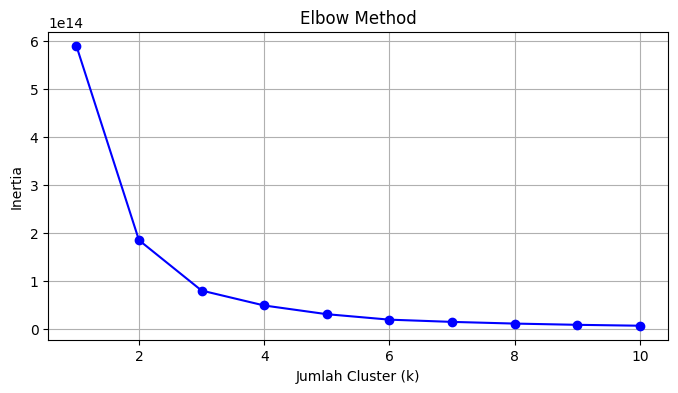

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df2 = df['nominal'].to_numpy().reshape(-1, 1)

# List untuk menyimpan nilai inersia
inertia = []

# Melakukan perulangan untuk berbagai nilai k (misalnya, dari 1 hingga 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

# Menampilkan plot elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()


In [33]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=0)
df2 = df["nominal"].to_numpy().reshape(-1, 1)
kmeans.fit(df2)
df['Cluster'] = kmeans.labels_


C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
df["Cluster"].value_counts()

Cluster
0    5032
1    2017
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


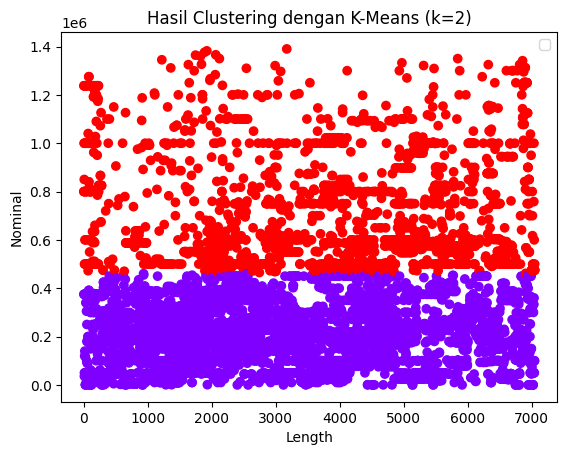

In [35]:
# Lihat data nominal
# Plot hasil clustering
plt.scatter(range(len(df)), df["nominal"], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Length')
plt.ylabel('Nominal')
plt.title('Hasil Clustering dengan K-Means (k=2)')
plt.legend()
plt.show()



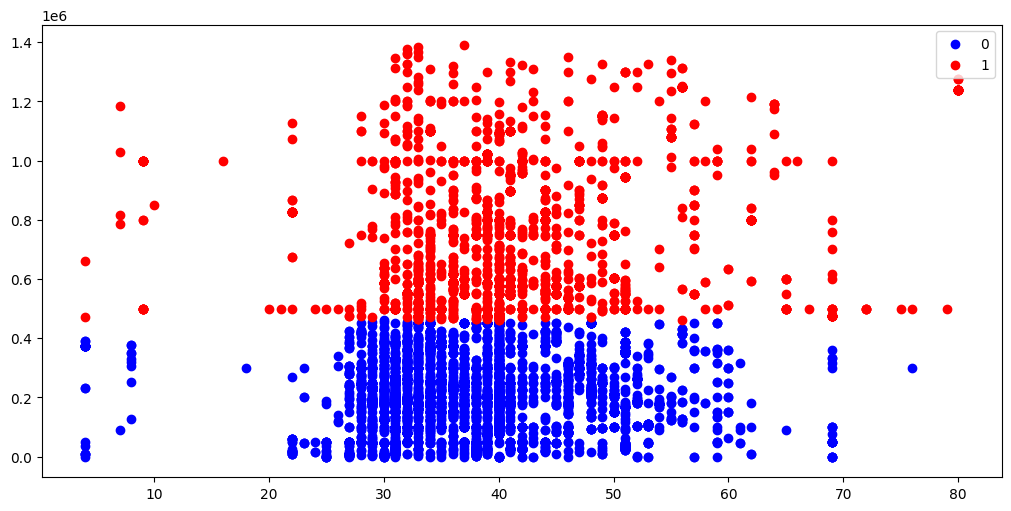

In [36]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")

ax.scatter(df[df["Cluster"] == 0]["umur"], df[df["Cluster"] == 0]["nominal"], color="blue", label="0")
ax.scatter(df[df["Cluster"] == 1]["umur"], df[df["Cluster"] == 1]["nominal"], color="red", label="1")

plt.legend()
plt.show()


In [37]:
df[df["Cluster"] == 0]["nominal"].describe()

count      5032.000000
mean     195860.928855
std      123289.154267
min           1.000000
25%      100000.000000
50%      192877.000000
75%      280887.500000
max      460450.000000
Name: nominal, dtype: float64

In [38]:
df[df["Cluster"] == 1]["nominal"].describe()

count    2.017000e+03
mean     7.264184e+05
std      2.317427e+05
min      4.614560e+05
25%      5.474080e+05
50%      6.200000e+05
75%      8.770890e+05
max      1.390000e+06
Name: nominal, dtype: float64

C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='nominal'>

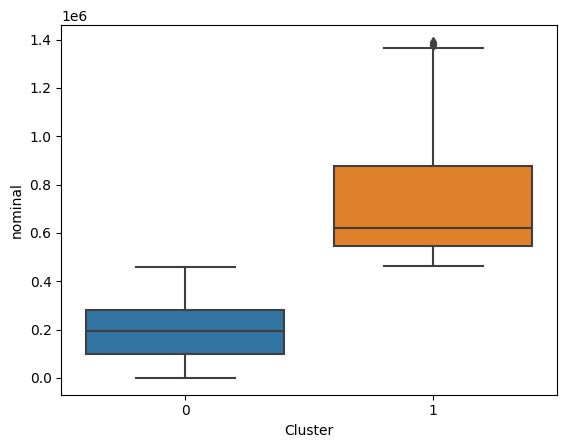

In [39]:
import seaborn as sns
sns.boxplot(data=df, x="Cluster", y="nominal")

### Cluster ke 0 = Nominal rendah dan Cluster ke 1 = Nominal tinggi

In [40]:
result = {0: "Nominal rendah", 1: "Nominal tinggi"}

resultt = [result[i] for i in df["Cluster"]]
df["kategori_nominal"] = resultt
df.drop("Cluster", axis=1, inplace=True)

In [41]:
df.head(5)

,umur,gender,nominal,periode_transaksi,kategori_nominal
0,62,1,800000,2,Nominal tinggi
1,4,1,375000,2,Nominal rendah
3,80,0,1237500,2,Nominal tinggi
4,62,1,800000,2,Nominal tinggi
5,80,0,1237500,2,Nominal tinggi


In [42]:
df.to_csv("./data_baru.csv")

### Data Splitting

In [43]:
import numpy as np

# Mengambil 10 sampel acak dari data menggunakan metode random sampling
n = 10
random_sample = df.sample(n)
print(random_sample)

      umur  gender  nominal  periode_transaksi kategori_nominal
7354    51       0   420000                  2   Nominal rendah
1977    32       1   288123                  2   Nominal rendah
5006    40       1  1065965                  2   Nominal tinggi
5185    40       0   300000                  1   Nominal rendah
4826    40       1   489580                  0   Nominal tinggi
3520    37       0   332920                  2   Nominal rendah
5949    42       0  1000000                  2   Nominal tinggi
4678    40       0   215968                  2   Nominal rendah
4428    39       0   100000                  2   Nominal rendah
2711    34       0   116000                  2   Nominal rendah


In [44]:
nominal = LabelEncoder().fit(df["kategori_nominal"])
df["kategori_nominal"] = nominal.transform(df["kategori_nominal"])

In [45]:
from sklearn.model_selection import train_test_split

# train_df akan berisi data pelatihan
# test_df akan berisi data pengujian
# Pisahkan data menjadi data pelatihan (80%) dan data pengujian (20%)

X = df.drop(['kategori_nominal', "nominal"], axis=1)  # 'nominal' adalah variabel target
y = df['kategori_nominal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Menampilkan hasil pemisahan
print("Data Pelatihan:")
print(X_train)
print(y_train)

print("\nData Pengujian:")
print(X_test)
print(y_test)

Data Pelatihan:
      umur  gender  periode_transaksi
425     27       0                  2
5011    40       0                  2
5505    41       0                  2
1302    31       0                  0
2517    34       0                  2
...    ...     ...                ...
4166    39       0                  2
5719    42       0                  1
5757    42       0                  2
5937    42       0                  2
985     30       0                  2

[5639 rows x 3 columns]
425     0
5011    1
5505    1
1302    0
2517    0
       ..
4166    0
5719    0
5757    0
5937    0
985     1
Name: kategori_nominal, Length: 5639, dtype: int32

Data Pengujian:
      umur  gender  periode_transaksi
3610    37       1                  2
1757    32       0                  2
2416    33       0                  0
3586    37       1                  2
6379    45       1                  2
...    ...     ...                ...
7770    54       0                  2
2537    34       0   

# Modeling

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pickle

In [48]:
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
# Fungsi untuk menghitung entropy
def calculate_entropy(data):
    total_samples = len(data)
    value_counts = data.value_counts()
    probabilities = value_counts / total_samples
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'periode_transaksi', 'kategori_nominal', 'nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.828364839994538
Entropy for gender: 0.8118958746170821
Entropy for periode_transaksi: 1.1924728031324334
Entropy for kategori_nominal: 0.863682530934168
Entropy for nominal: 8.620609554877865


In [50]:
y_pred = model_c45.predict(X_test)

# Evaluation

In [51]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.7624113475177305
Precision: 0.6410256410256411
Recall: 0.2638522427440633
Confusion Matrix:
[[975  56]
 [279 100]]


### Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Buat model Decision Tree
model = DecisionTreeClassifier()

# Data X dan label y telah diinisialisasi sebelumnya

# Lakukan 10-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Tampilkan hasil cross-validation
print("Hasil Cross-Validation:")
print("Rata-rata Akurasi: ", np.mean(scores))
print("Standar Deviasi Akurasi: ", np.std(scores))

Hasil Cross-Validation:
Rata-rata Akurasi:  0.3392113958736299
Standar Deviasi Akurasi:  0.2100102942624363


### Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi Grid Search dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)
# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)


Hyperparameter terbaik: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Akurasi model terbaik: 0.7631205673758865


C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Julia\.conda\envs\OpenCV\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\

In [55]:
X

,umur,gender,periode_transaksi
0,62,1,2
1,4,1,2
3,80,0,2
4,62,1,2
5,80,0,2
...,...,...,...
8147,69,0,0
8148,69,0,0
8150,69,0,0
8151,69,0,0


### Percobaan Scaling Umur

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df["umur"].to_numpy().reshape(-1, 1))
X["umur"] = scaler.transform(X["umur"].to_numpy().reshape(-1, 1))
X

,umur,gender,periode_transaksi
0,2.629695,1,2
1,-3.914921,1,2
3,4.660783,0,2
4,2.629695,1,2
5,4.660783,0,2
...,...,...,...
8147,3.419563,0,0
8148,3.419563,0,0
8150,3.419563,0,0
8151,3.419563,0,0


### Modelling dan Evaluation lagi

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'periode_transaksi', 'kategori_nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.828364839994538
Entropy for gender: 0.8118958746170821
Entropy for periode_transaksi: 1.1924728031324334
Entropy for kategori_nominal: 0.863682530934168


In [60]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.7624113475177305
Precision: 0.6410256410256411
Recall: 0.2638522427440633
Confusion Matrix:
[[975  56]
 [279 100]]


<Axes: >

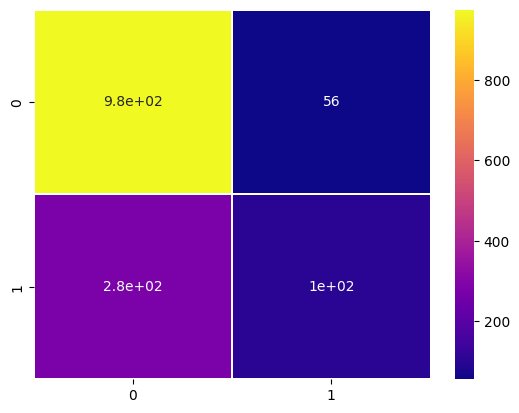

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="plasma", linewidths=.2, linecolor="white")

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1031
           1       0.64      0.26      0.37       379

    accuracy                           0.76      1410
   macro avg       0.71      0.60      0.61      1410
weighted avg       0.74      0.76      0.72      1410



In [65]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.26      0.76      0.39       353
           1       0.78      0.28      0.41      1057

    accuracy                           0.40      1410
   macro avg       0.52      0.52      0.40      1410
weighted avg       0.65      0.40      0.41      1410



In [66]:
X["umur"] = scaler.inverse_transform(X["umur"].to_numpy().reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [68]:
y_pred = model_c45.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1031
           1       0.64      0.26      0.37       379

    accuracy                           0.76      1410
   macro avg       0.71      0.60      0.61      1410
weighted avg       0.74      0.76      0.72      1410



<Axes: >

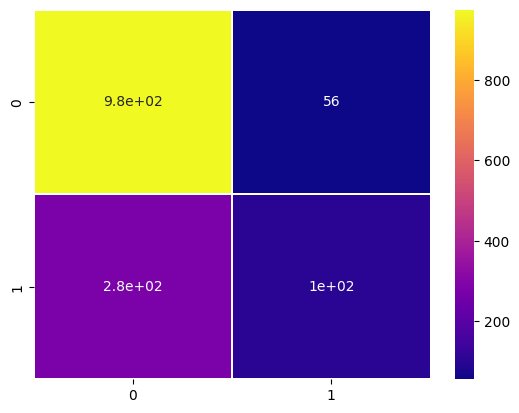

In [69]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, cmap="plasma", linewidths=.2, linecolor="white")


In [72]:
# Simpan model ke dalam file
with open('model_prediction_fundraising.pkl', 'wb') as file:
    pickle.dump(model_c45, file)
    
# Memuat model dari file    
with open('model_prediction_fundraising.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
